In [71]:
from datetime import datetime
import os
import sys
from datetime import datetime, timedelta
from tkinter import Tk, simpledialog
import matplotlib.pyplot as plt
import cv2
import pandas as pd

## Folder Creation

In [2]:
datasetFolderName = "./rajasthan_stone_worker_data"
timestamp = "2025-03-30_10-22-15"
if False:
    timestamp = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
    print(timestamp)
    processedDataFolder_name = f"./processedData/{timestamp}/"
else:
    processedDataFolder_name = f"./processedData/{timestamp}/" 

day1 = processedDataFolder_name + "day1/"
day2 = processedDataFolder_name + "day2/"
day3 = processedDataFolder_name + "day3/"


if not os.path.exists(processedDataFolder_name):
    os.makedirs(processedDataFolder_name)
    os.makedirs(day1)
    os.makedirs(day2)
    os.makedirs(day3)
    print(f"Folder '{processedDataFolder_name}' created.")
else:
    print(f"Folder '{processedDataFolder_name}' already exists.")

subDirs = ["activityAnnotations","radarData"]
subSubDirs = ["nano1","nano2","nano3"]
for subdir in subDirs:
    path = os.path.join(day1,subdir)
    if not os.path.exists(path):
        os.makedirs(path)
        print(f"Folder '{path}' created.")
    else:
        print(f"Folder '{path}' already exists.")
    
for subdir in subDirs:
    path = os.path.join(day2,subdir)
    if not os.path.exists(path):
        os.makedirs(path)
        print(f"Folder '{path}' created.")
    else:
        print(f"Folder '{path}' already exists.")
    
for subdir in subDirs:
    path = os.path.join(day3,subdir)
    for subSubDir in subSubDirs:
        subPath = os.path.join(path,subSubDir)
        if not os.path.exists(subPath):
            os.makedirs(subPath)
            print(f"Folder '{subPath}' created.")
        else:
            print(f"Folder '{subPath}' already exists.")
    





Folder './processedData/2025-03-30_10-22-15/' already exists.
Folder './processedData/2025-03-30_10-22-15/day1/activityAnnotations' already exists.
Folder './processedData/2025-03-30_10-22-15/day1/radarData' already exists.
Folder './processedData/2025-03-30_10-22-15/day2/activityAnnotations' already exists.
Folder './processedData/2025-03-30_10-22-15/day2/radarData' already exists.
Folder './processedData/2025-03-30_10-22-15/day3/activityAnnotations/nano1' already exists.
Folder './processedData/2025-03-30_10-22-15/day3/activityAnnotations/nano2' already exists.
Folder './processedData/2025-03-30_10-22-15/day3/activityAnnotations/nano3' already exists.
Folder './processedData/2025-03-30_10-22-15/day3/radarData/nano1' already exists.
Folder './processedData/2025-03-30_10-22-15/day3/radarData/nano2' already exists.
Folder './processedData/2025-03-30_10-22-15/day3/radarData/nano3' already exists.


In [3]:

# videoData = {
#     'day1': {'nano1': [], 'nano2': [], 'nano3': []},
#     'day2': {'nano1': [], 'nano2': [], 'nano3': []},
#     'day3': {'nano1': [], 'nano2': [], 'nano3': []}
# }

# day_mapping = {
#     29: 'day1',
#     30: 'day2',
#     2: 'day3'
# }
# st = "./rajasthan_stone_worker_data/mmwave_data/nano1_29_11_2024/nano1_video_data/video_2024-11-29_22-16-54_nano1.mp4"
# val = st.split("/")[-3].split("_")

# if int(val[1]) in day_mapping:
#     day = day_mapping[int(val[1])]
#     nano = val[0]
#     if nano in videoData[day]:
#         videoData[day][nano].append(st)
# videoData

In [36]:
mmwaveFiles = {
    'day1': {'nano1': [], 'nano2': [], 'nano3': []},
    'day2': {'nano1': [], 'nano2': [], 'nano3': []},
    'day3': {'nano1': [], 'nano2': [], 'nano3': []}
}
day_mapping = {
    29: 'day1',
    30: 'day2',
    2: 'day3'
}
for root, dirs, files in os.walk(os.path.join(datasetFolderName, "mmwave_data")):
    if any(nano in root for nano in ['nano1_mmwave', 'nano2_mmwave', 'nano3_mmwave']):
        nano_name = root.split('/')[-1].split('_')[0]  
        for file in files:
            if file.lower().endswith('.npy') and file.lower().startswith("adc"):
                # print(f"{nano_name}: {file}")
                st = os.path.join(root, file)
                val = st.split("/")[-3].split("_")
                if int(val[1]) in day_mapping:
                    day = day_mapping[int(val[1])]
                    nano = val[0]
                    if nano in mmwaveFiles[day]:
                        mmwaveFiles[day][nano].append(st)

In [37]:
mmwaveFiles

{'day1': {'nano1': ['./rajasthan_stone_worker_data/mmwave_data/nano1_29_11_2024/nano1_mmwave_data/adc_data_2024-11-29_12-54-42.npy',
   './rajasthan_stone_worker_data/mmwave_data/nano1_29_11_2024/nano1_mmwave_data/adc_data_2024-11-29_12-14-29.npy',
   './rajasthan_stone_worker_data/mmwave_data/nano1_29_11_2024/nano1_mmwave_data/adc_data_2024-11-29_12-25-12.npy',
   './rajasthan_stone_worker_data/mmwave_data/nano1_29_11_2024/nano1_mmwave_data/adc_data_2024-11-29_12-11-03.npy',
   './rajasthan_stone_worker_data/mmwave_data/nano1_29_11_2024/nano1_mmwave_data/adc_data_2024-11-29_12-50-56.npy',
   './rajasthan_stone_worker_data/mmwave_data/nano1_29_11_2024/nano1_mmwave_data/adc_data_2024-11-29_12-28-02.npy',
   './rajasthan_stone_worker_data/mmwave_data/nano1_29_11_2024/nano1_mmwave_data/adc_data_2024-11-29_12-30-41.npy',
   './rajasthan_stone_worker_data/mmwave_data/nano1_29_11_2024/nano1_mmwave_data/adc_data_2024-11-29_12-48-19.npy',
   './rajasthan_stone_worker_data/mmwave_data/nano1_29_

In [4]:
videoFiles = {
    'day1': {'nano1': [], 'nano2': [], 'nano3': []},
    'day2': {'nano1': [], 'nano2': [], 'nano3': []},
    'day3': {'nano1': [], 'nano2': [], 'nano3': []}
}

day_mapping = {
    29: 'day1',
    30: 'day2',
    2: 'day3'
}






for root, dirs, files in os.walk(os.path.join(datasetFolderName + "/mmwave_data")):
    if 'video' in root:
        for file in files:
            if file.lower().endswith(('.mp4', '.avi', '.mov', '.wmv', '.mkv', '.flv', '.webm')) and file.lower().startswith("video"):
                st = os.path.join(root, file)
                val = st.split("/")[-3].split("_")
                if int(val[1]) in day_mapping:
                    day = day_mapping[int(val[1])]
                    nano = val[0]
                    if nano in videoFiles[day]:
                        videoFiles[day][nano].append(st)
            # if file.lower().endswith(('.npy')) and file.lower().startswith("adc"):
            #     st = os.path.join(root, file)
            #     val = st.split("/")[-3].split("_")
            #     if int(val[1]) in day_mapping:
            #         day = day_mapping[int(val[1])]
            #         nano = val[0]
            #         if nano in videoFiles[day]:
            #             videoFiles[day][nano].append(st)
                # print(os.path.join(root, file))
# videoMmwaveFiles = {
#     'videoFiles': videoFiles,
#     'mmwaveFile': mmwaveFile
# }

In [5]:
videoFiles

{'day1': {'nano1': ['./rajasthan_stone_worker_data/mmwave_data/nano1_29_11_2024/nano1_video_data/video_2024-11-26_22-13-25_nano1.mp4',
   './rajasthan_stone_worker_data/mmwave_data/nano1_29_11_2024/nano1_video_data/video_2024-11-29_12-57-20_nano1.mp4',
   './rajasthan_stone_worker_data/mmwave_data/nano1_29_11_2024/nano1_video_data/video_2024-11-29_11-51-17_nano1.mp4',
   './rajasthan_stone_worker_data/mmwave_data/nano1_29_11_2024/nano1_video_data/video_2024-11-29_22-16-54_nano1.mp4',
   './rajasthan_stone_worker_data/mmwave_data/nano1_29_11_2024/nano1_video_data/video_2024-11-29_12-01-37_nano1.mp4',
   './rajasthan_stone_worker_data/mmwave_data/nano1_29_11_2024/nano1_video_data/video_2024-11-29_12-14-32_nano1.mp4',
   './rajasthan_stone_worker_data/mmwave_data/nano1_29_11_2024/nano1_video_data/video_2024-11-29_12-45-28_nano1.mp4',
   './rajasthan_stone_worker_data/mmwave_data/nano1_29_11_2024/nano1_video_data/video_2024-11-29_12-35-13_nano1.mp4',
   './rajasthan_stone_worker_data/mmwav

In [6]:
# for videoFilePath in videoFiles["day3"]["nano1"]:
#     print(videoFilePath.split("/")[-1])
    

In [ ]:
for videoFilePath in videoFiles["day3"]["nano3"]:
    print(f"Starting annotation for {videoFilePath}")
    video_path = videoFilePath.split("/")[-1]
    start_time_str = video_path.split("_")[1] + " " + video_path.split("_")[2]
    start_time = datetime.strptime(start_time_str, "%Y-%m-%d %H-%M-%S")


    cap = cv2.VideoCapture(videoFilePath)
    if not cap.isOpened():
        print(f"Error: Cannot open video file: {video_path}")
        sys.exit(-1)


    fps = cap.get(cv2.CAP_PROP_FPS)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print(f"Processing {video_path} | FPS: {fps}, Total Frames: {total_frames}")
    
    annotations = []
    frame_number = 0

    # Initialize a basic GUI for user input
    root = Tk()
    root.withdraw()  # Hide the main Tkinter window
    
    isAnnoted = simpledialog.askinteger(
            "Annotate Segment",
            f"Video: {video_path}\n"
            f"Is the video annoted?\n"
            f"Enter 0 for 'YES' and 1 for 'NO':",
            minvalue=0,
            maxvalue=1
        )
        
    if isAnnoted == 0:
        print("Annotation done for the video.")
        continue
    
    while frame_number < total_frames:
                    
        start = simpledialog.askstring(
            "Annotate Segment",
            f"Video: {video_path}\n"
            f"Enter start time (HH.MM.SS) for current annotation:"
        )
    
        end = simpledialog.askstring(
            "Annotate Segment",
            f"Video: {video_path}\n"
            f"Enter end time (HH.MM.SS) for current annotation:"
        )
    
        # Convert HH:MM:SS to integers
        start_t = start
        end_t = end
        start = start.split(".")
        end = end.split(".")
        for i in range(len(start)):
            start[i] = int(start[i])
        for i in range(len(end)):
            end[i] = int(end[i])
        start = int(start[0] * 3600 + start[1] * 60 + start[2])
        end = int(end[0] * 3600 + end[1] * 60 + end[2])
    
        chunk_size = (end - start + 1) * 30
        frames = []
        for _ in range(chunk_size):
            ret, frame = cap.read()
            if not ret:
                break
            frames.append(frame)
            frame_number += 1
    
        if not frames:
            break
    
        # cv2.imshow("Annotate Chunk (Press Q to Quit)", frames[-1])
        # Prompt user to annotate the segment
        start_frame = frame_number - len(frames)
        end_frame = frame_number - 1
    
        label = simpledialog.askstring(
            "Annotate Segment",
            f"Video: {video_path}\n"
            f"Frames: {start_frame} - {end_frame}\n"
            f"Enter activity:"
        )
    
        if label:
            for i in range(len(frames)):
                current_frame = start_frame + i
                current_time = start_time + timedelta(seconds=current_frame / fps)
                timestamp = current_time.strftime("%Y-%m-%d %H:%M:%S.%f")[:-3]
                annotations.append({
                    "Video": video_path,
                    "Frame": current_frame,
                    "Timestamp": timestamp,
                    "Start Time": start_t,
                    "End Time": end_t,
                    "Start Frame": start,
                    "End Frame": end,
                    "Activity": label
                })
        else:
            print(f"Skipped segment {start_frame}-{end_frame}.")
    
        print(f"Number of frames processed: {len(frames)}")
        isLast = simpledialog.askinteger(
            "Annotate Segment",
            f"Video: {video_path}\n"
            f"Was that the last frame annotation?\n"
            f"Enter 0 for 'YES' and 1 for 'NO':",
            minvalue=0,
            maxvalue=1
        )
    
        if isLast == 0:
            print("Annotation stopped by user.")
            break
    
        # if cv2.waitKey(1) & 0xFF == ord('q'):
        #     print("Annotation stopped by user.")
        #     break
    
    cap.release()
    cv2.destroyAllWindows()
    root.destroy()
    annotationsDf = pd.DataFrame(annotations)
    csvFileName = f"{video_path[:-4]}.csv"
    csvFilePath = day3+"activityAnnotations/"+video_path.split(".")[0].split("_")[-1]+"/"+csvFileName
    annotationsDf.to_csv(path_or_buf=csvFilePath, index=False)
    print(f"Saved data to {csvFilePath}")


Starting annotation for ./rajasthan_stone_worker_data/mmwave_data/nano3_02_12_2024/nano3_video_data/video_2024-12-02_13-22-17_nano3.mp4
Processing video_2024-12-02_13-22-17_nano3.mp4 | FPS: 30.0, Total Frames: 18000
Annotation done for the video.
Starting annotation for ./rajasthan_stone_worker_data/mmwave_data/nano3_02_12_2024/nano3_video_data/video_2024-12-02_12-22-57_nano3.mp4
Processing video_2024-12-02_12-22-57_nano3.mp4 | FPS: 30.0, Total Frames: 18000
Annotation done for the video.
Starting annotation for ./rajasthan_stone_worker_data/mmwave_data/nano3_02_12_2024/nano3_video_data/video_2024-12-02_13-33-20_nano3.mp4
Processing video_2024-12-02_13-33-20_nano3.mp4 | FPS: 30.0, Total Frames: 18000
Annotation done for the video.
Starting annotation for ./rajasthan_stone_worker_data/mmwave_data/nano3_02_12_2024/nano3_video_data/video_2024-12-02_13-54-57_nano3.mp4
Processing video_2024-12-02_13-54-57_nano3.mp4 | FPS: 30.0, Total Frames: 18000
Annotation done for the video.
Starting ann

In [50]:
nano1 =[]
nano3 = []
for root, dirs, files in os.walk(os.path.join("./processedData")):
    # print(files)
    for file in files:
        # print(file)
        if file.lower().endswith(('.csv')) and not file.lower().endswith(('checkpoint.csv')):
            print(file)
            st = os.path.join(root, file)
            val = st.split("/")[-3].split("_")
            if 'nano1' in file:
                nano1.append(st)
            if 'nano3' in file:
                nano3.append(st)            

video_2024-12-02_14-32-12_nano1.csv
video_2024-12-02_14-42-22_nano1.csv
video_2024-12-02_13-28-39_nano1.csv
video_2024-12-02_13-03-48_nano1.csv
video_2024-12-02_12-23-17_nano1.csv
video_2024-12-02_13-50-18_nano1.csv
video_2024-12-02_14-52-45_nano1.csv
video_2024-12-02_14-22-05_nano1.csv
video_2024-12-02_14-11-59_nano1.csv
video_2024-12-02_12-52-40_nano1.csv
video_2024-12-02_15-03-19_nano1.csv
video_2024-12-02_14-00-42_nano1.csv
video_2024-12-02_13-15-50_nano1.csv
video_2024-12-02_13-38-49_nano1.csv
video_2024-12-02_13-54-57_nano3.csv
video_2024-12-02_12-52-29_nano3.csv
video_2024-12-02_14-37-44_nano3.csv
video_2024-12-02_12-22-57_nano3.csv
video_2024-12-02_13-44-47_nano3.csv
video_2024-12-02_14-05-46_nano3.csv
video_2024-12-02_13-22-17_nano3.csv
video_2024-12-02_13-33-20_nano3.csv


In [54]:

nano1_stack = pd.DataFrame()
nano3_stack = pd.DataFrame()

for file in nano1:
    temp_df = pd.read_csv(file)
    nano1_stack = pd.concat([nano1_stack, temp_df], ignore_index=True)

# for file in nano3:
#     print(file)
#     temp_df = pd.read_csv(file)
#     nano3_stack = pd.concat([nano3_stack, temp_df], ignore_index=True)

In [62]:
nano1_stack.head()

,Video,Frame,Timestamp,Start Time,End Time,Start Frame,End Frame,Activity
0,video_2024-12-02_14-32-12_nano1.mp4,0,2024-12-02 14:32:12.000,0.0.0,0.0.15,0,15,"2,3"
1,video_2024-12-02_14-32-12_nano1.mp4,1,2024-12-02 14:32:12.033,0.0.0,0.0.15,0,15,"2,3"
2,video_2024-12-02_14-32-12_nano1.mp4,2,2024-12-02 14:32:12.066,0.0.0,0.0.15,0,15,"2,3"
3,video_2024-12-02_14-32-12_nano1.mp4,3,2024-12-02 14:32:12.100,0.0.0,0.0.15,0,15,"2,3"
4,video_2024-12-02_14-32-12_nano1.mp4,4,2024-12-02 14:32:12.133,0.0.0,0.0.15,0,15,"2,3"


In [63]:
nano1_stack['Activity']

0         2,3
1         2,3
2         2,3
3         2,3
4         2,3
         ... 
251995      7
251996      7
251997      7
251998      7
251999      7
Name: Activity, Length: 252000, dtype: object

In [64]:
activity_mapping = {
    1: "Moving",
    2: "Grinding",
    3: "Cutting",
    4: "Drawing",
    5: "Chipping",
    7: "Polishing",
    0: "No activity",
    6: "No Person in the FoV"
}

In [65]:
def map_activities(activity_str):
    # Split the activity string (e.g., '2,3') into individual labels
    labels = [int(label) for label in activity_str.split(",")]
    # Map each label to its description using the activity_mapping dictionary
    return [activity_mapping[label] for label in labels]

In [68]:
nano1_stack["Mapped Activities"] = nano1_stack["Activity"].apply(map_activities)

# Display the updated DataFrame
print(nano1_stack)

                                      Video  Frame                Timestamp  \
0       video_2024-12-02_14-32-12_nano1.mp4      0  2024-12-02 14:32:12.000   
1       video_2024-12-02_14-32-12_nano1.mp4      1  2024-12-02 14:32:12.033   
2       video_2024-12-02_14-32-12_nano1.mp4      2  2024-12-02 14:32:12.066   
3       video_2024-12-02_14-32-12_nano1.mp4      3  2024-12-02 14:32:12.100   
4       video_2024-12-02_14-32-12_nano1.mp4      4  2024-12-02 14:32:12.133   
...                                     ...    ...                      ...   
251995  video_2024-12-02_13-38-49_nano1.mp4  17995  2024-12-02 13:48:48.833   
251996  video_2024-12-02_13-38-49_nano1.mp4  17996  2024-12-02 13:48:48.866   
251997  video_2024-12-02_13-38-49_nano1.mp4  17997  2024-12-02 13:48:48.900   
251998  video_2024-12-02_13-38-49_nano1.mp4  17998  2024-12-02 13:48:48.933   
251999  video_2024-12-02_13-38-49_nano1.mp4  17999  2024-12-02 13:48:48.966   

       Start Time End Time  Start Frame  End Frame 

In [ ]:
nano1_stack['Timestamp'].head()

TypeError: unhashable type: 'list'

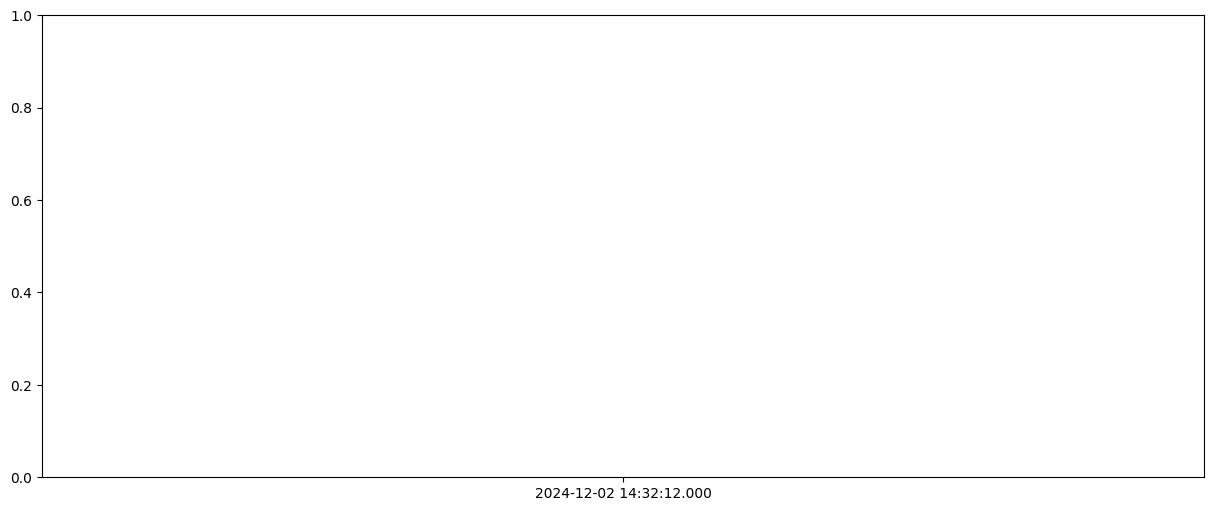

In [73]:
plt.figure(figsize=(15, 6))
plt.plot(nano1_stack["Timestamp"], nano1_stack["Mapped Activities"], marker="o", linestyle="-")
plt.title("Activities Over Time", fontsize=16)
plt.xlabel("Timestamp", fontsize=14)
plt.ylabel("Activity", fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()